<a href="https://colab.research.google.com/github/yrb1802/Classification---Health-Insurance-Cross-Sell-Prediction/blob/main/Classification_Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
#Checking For Null values
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [ ]:
# Checking number of rows and columns

print(f"Number of rows: {df.shape[0]}    &    Number of columns: {df.shape[1]}")

Number of rows: 381109    &    Number of columns: 12


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Getting to know the data
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**Variables Description**

id : Unique ID for the customer

Gender : Gender of the customer

Age : Age of the customer

Driving_License 0 : Customer does not have DL, 1 : Customer already has DL

Region_Code : Unique code for the region of the customer

Previously_Insured : 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

Vehicle_Age : Age of the Vehicle

Vehicle_Damage :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

Annual_Premium : The amount customer needs to pay as premium in the year

PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage : Number of Days, Customer has been associated with the company

Response : 1 : Customer is interested, 0 : Customer is not interested


In [ ]:
# Unique values

df.nunique()

,0
id,381109
Gender,2
Age,66
Driving_License,2
Region_Code,53
Previously_Insured,2
Vehicle_Age,3
Vehicle_Damage,2
Annual_Premium,48838
Policy_Sales_Channel,155


# **Data - Visualization**

<Axes: xlabel='Response', ylabel='count'>

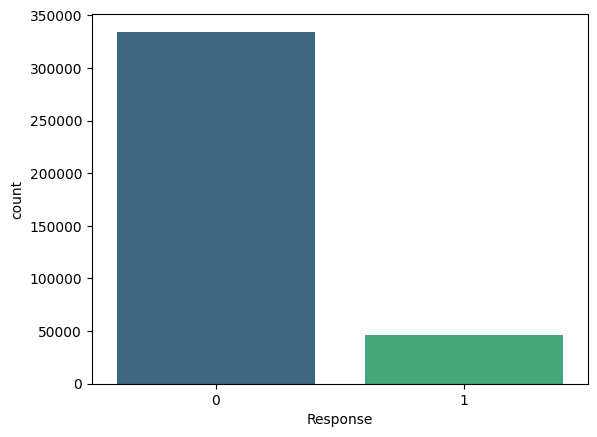

In [ ]:
# Plot1 For Target variable count


sns.countplot(x= df['Response'],data= df, palette='viridis')

<Axes: ylabel='Response'>

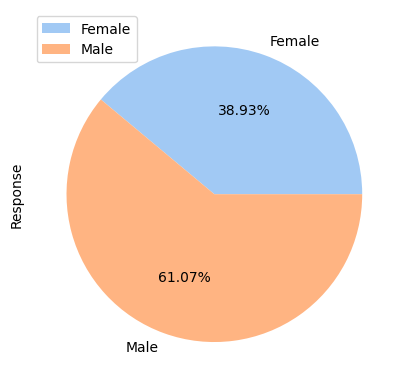

In [ ]:
# Plot 2- Willingness of male and female
colors= sns.color_palette("pastel")
plt.figure
df.groupby(['Gender']).sum().plot(kind='pie',y='Response', autopct='%1.2f%%', colors=colors)

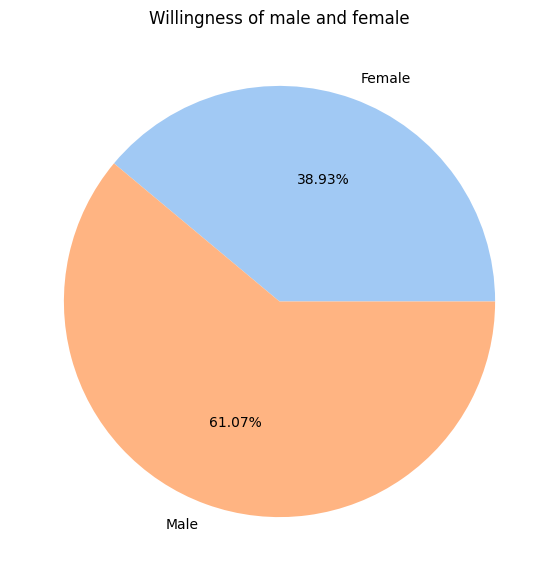

In [ ]:
# Different approach for the above pie chart
response_count= df.groupby('Gender')['Response'].sum()
plt.figure(figsize=(8,7))
plt.pie(response_count,labels=response_count.index, autopct='%1.2f%%',colors=colors)
plt.title("Willingness of male and female")
plt.show()

Text(0.5, 1.0, 'Response in Male and Female')

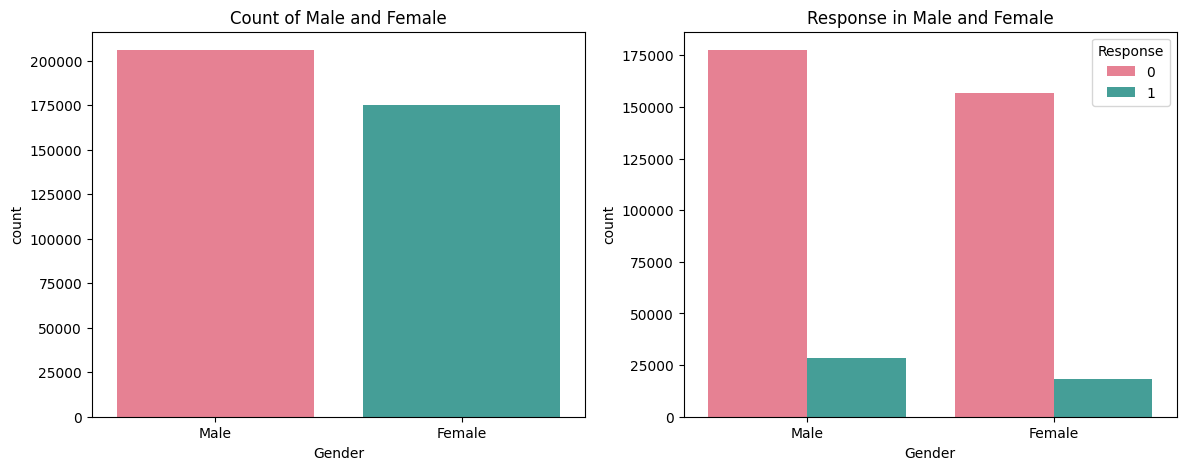

In [ ]:
# Plot 3- Count of male and female and response in Male and female

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Gender'], palette='husl')
plt.title("Count of Male and Female")

plt.subplot(1,2,2)
sns.countplot(x=df['Gender'], hue= df['Response'],palette='husl')
plt.title("Response in Male and Female")

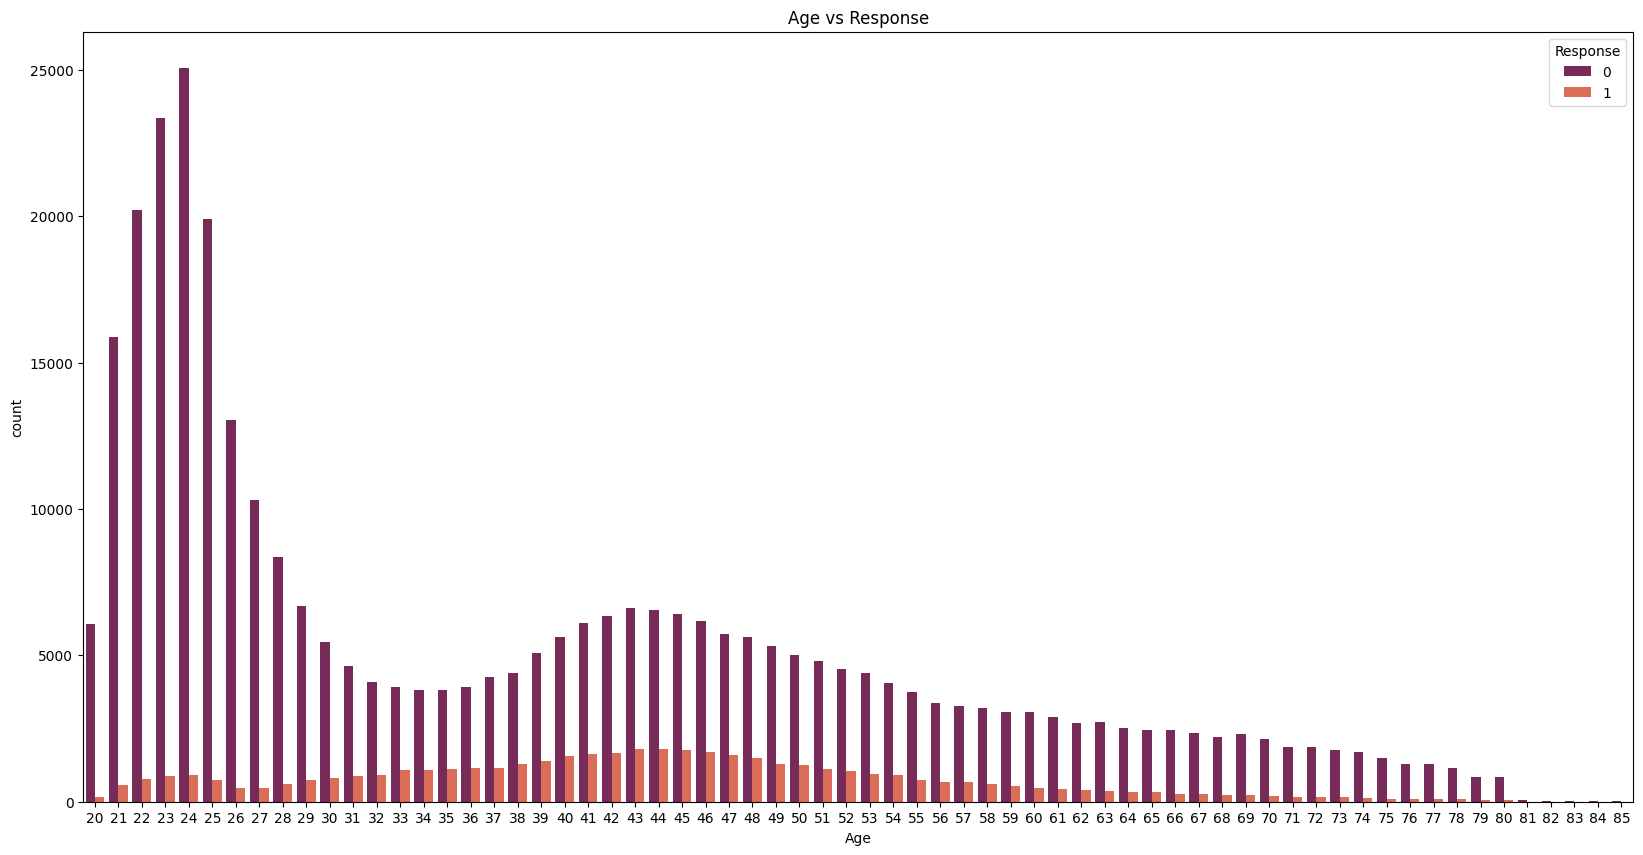

In [ ]:
#Plot 4 - Age V/S Response-

plt.figure(figsize=(20,10))
sns.countplot(x='Age', hue='Response',data=df,palette= 'rocket')
plt.title("Age vs Response")
plt.show()

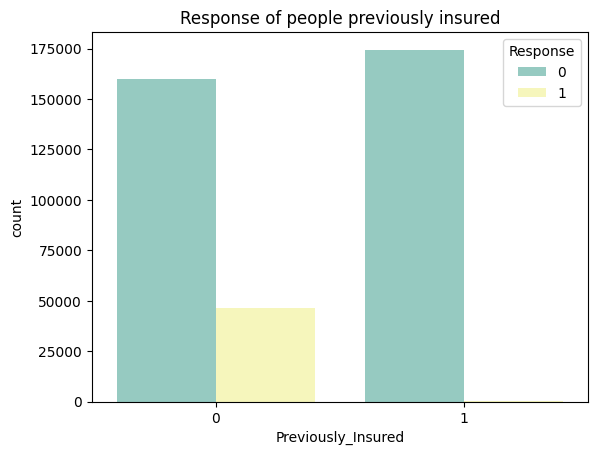

In [ ]:
# Preference of previously insured people...

sns.countplot(x=df['Previously_Insured'], hue=df['Response'], data= df, palette='Set3')
plt.title("Response of people previously insured")
plt.show()

Text(0, 0.5, '')

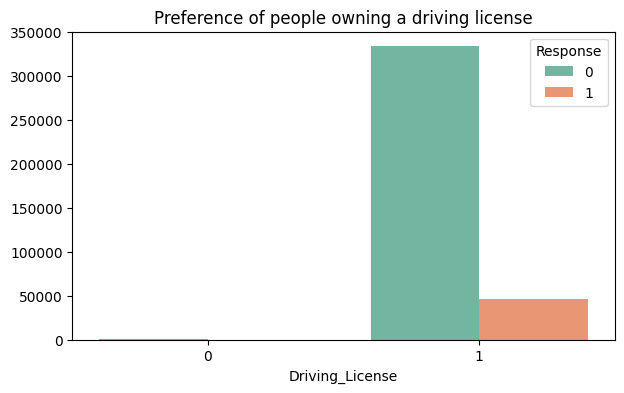

In [ ]:
# Preference of people owning a driving license...

plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Driving_License',hue='Response',palette='Set2')
plt.title("Preference of people owning a driving license")
plt.ylabel('')

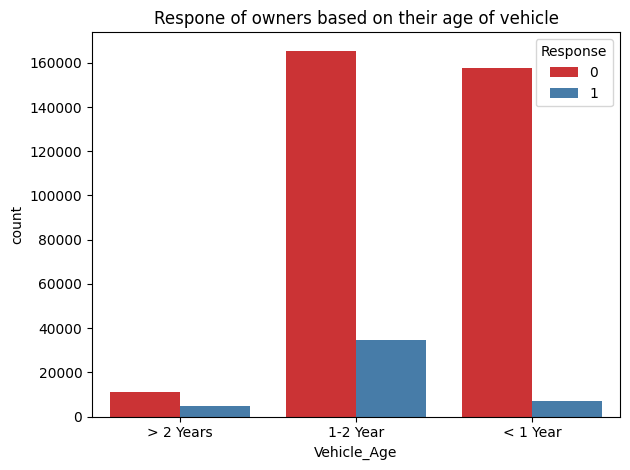

In [ ]:
# Respone of owners based on their age of vehicle...

sns.countplot(x=df['Vehicle_Age'],hue=df['Response'],palette='Set1')
plt.title("Respone of owners based on their age of vehicle")
plt.tight_layout()
plt.show()

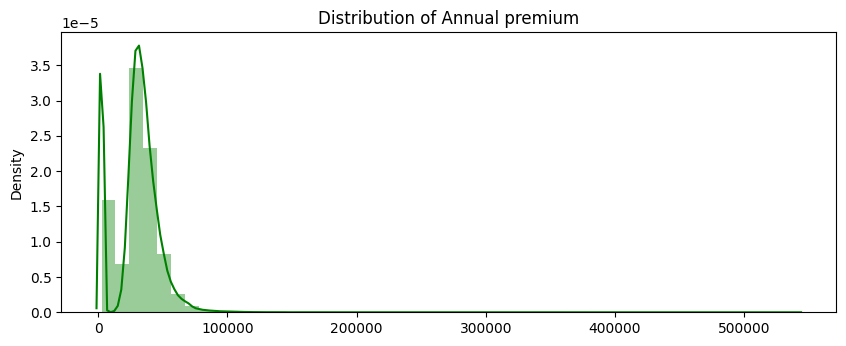

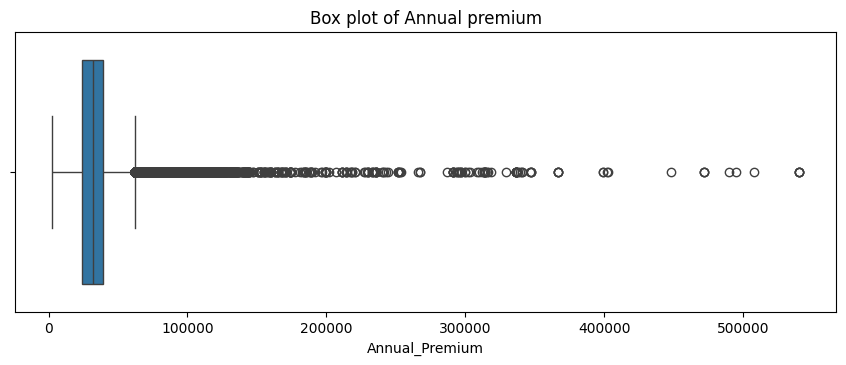

In [ ]:
# Distribution of Annual premium...

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.distplot(x=df['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()

plt.figure(figsize=(10.6,8))
plt.subplot(2,1,2)
sns.boxplot(x=df['Annual_Premium'])
plt.title("Box plot of Annual premium")
plt.show()

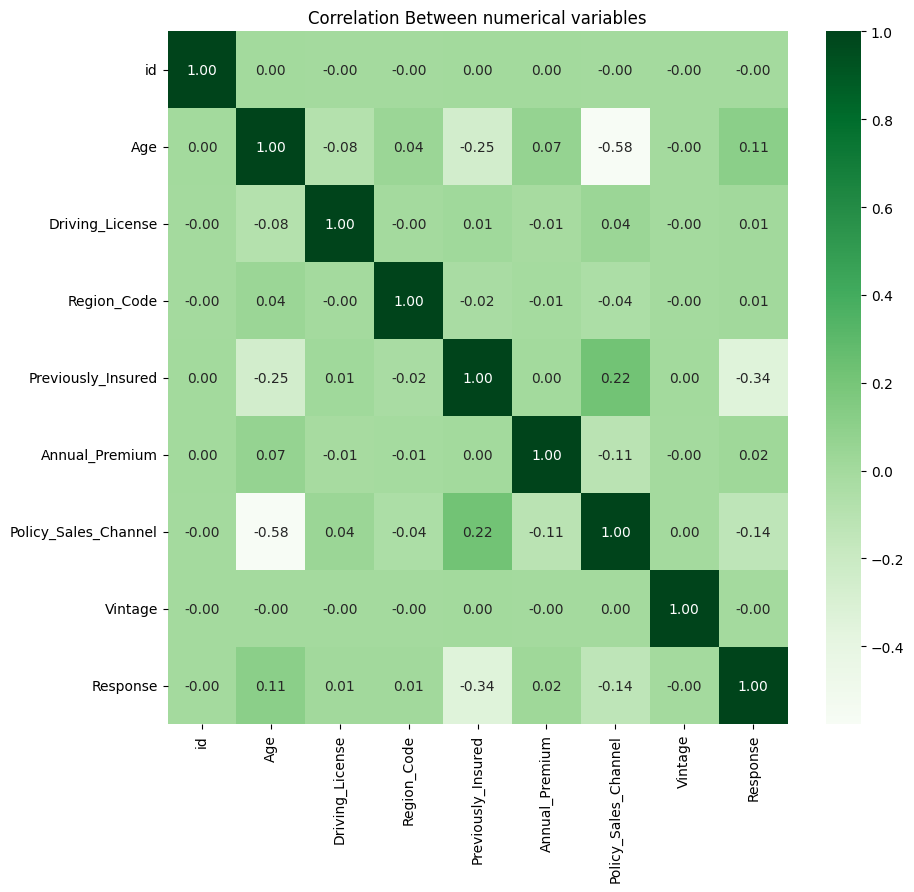

In [ ]:
df_corr = df.select_dtypes(include=['number']).corr()  # Select only numerical columns
fig, ax = plt.subplots(figsize=(10,9))
sns.heatmap(df_corr, fmt='.2f',annot=True,ax=ax,cmap='Greens')
plt.title("Correlation Between numerical variables")
plt.show()

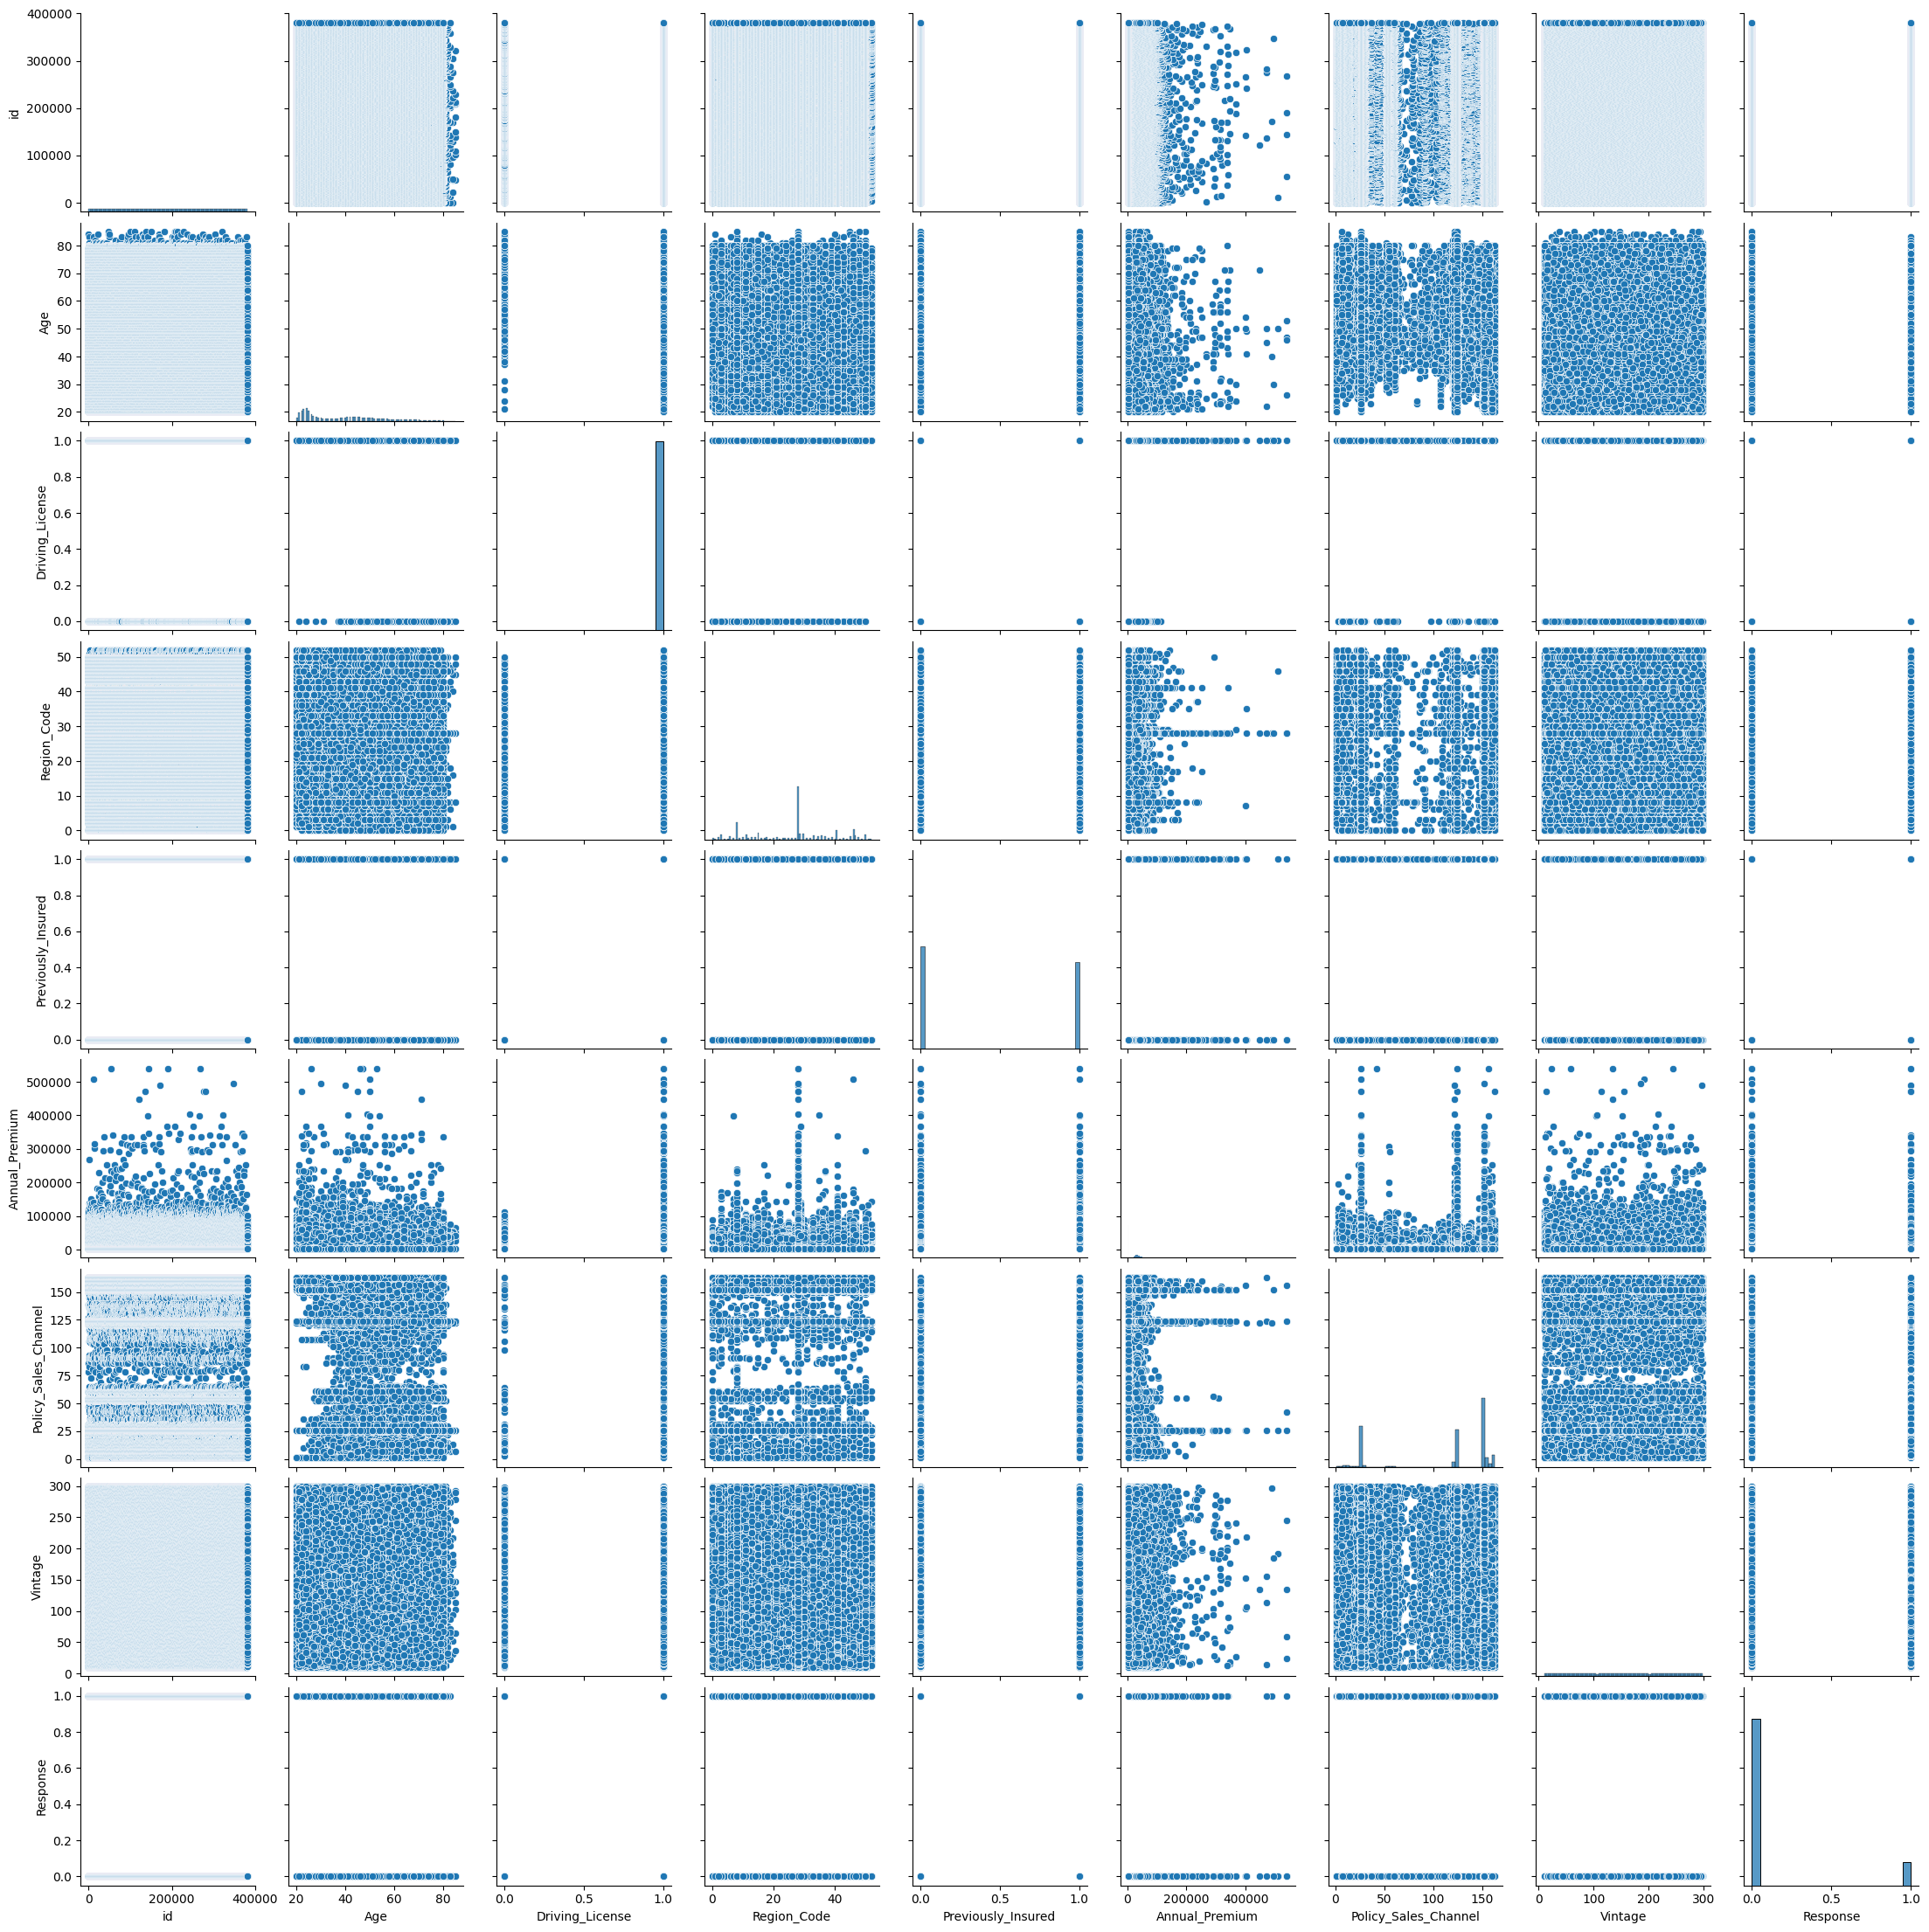

In [ ]:
sns.pairplot(df)
plt.show()

# **Data Preparation**

In [ ]:
# Encoding values of categorical values-
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Vehicle_Damage']=le.fit_transform(df['Vehicle_Damage'])
df['Vehicle_Age']=df['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year': 1, '> 2 Years':2})

"""
Avoid label encoding in variables like Vehicle_Age because it migh assign values in any order which might confuse model.
for example it might assign '>2' a 0 value soo model will get confuse and give it a low ranking.

"""

"\nAvoid label encoding in variables like Vehicle_Age because it migh assign values in any order which might confuse model.\nfor example it might assign '>2' a 0 value soo model will get confuse and give it a low ranking.\n\n"

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [ ]:
# Separating X and y labels-

y=df['Response']    # Dependent or Target Variable
X=df.drop(['Response','id'],axis=1)   # Independent Variable.... Removed 'id' because it might have created unecessary noise for the model

## **Feature Selection**

[0.00471885 0.14614208 0.00048032 0.10862847 0.05010941 0.02022924
 0.07894848 0.24527114 0.06874916 0.27672285]


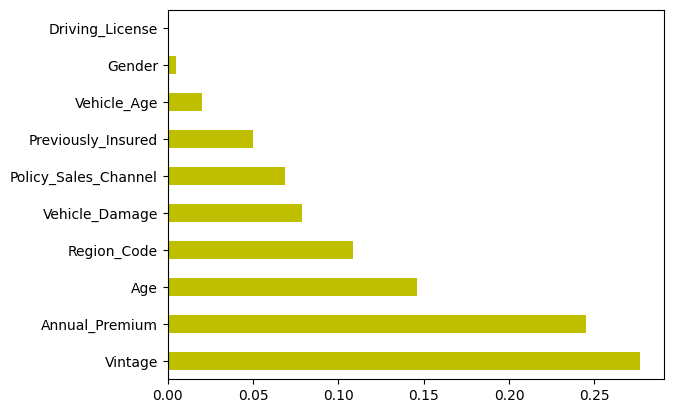

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
# Ploting important feature in hirarchy for better visualization
feat_imp= pd.Series(model.feature_importances_,index=X.columns)
feat_imp.nlargest(10).plot(kind='barh', color='y')
plt.show()

# **Handling Class Imbalance**

Orignal Dataset Shape Counter({0: 334399, 1: 46710})
Resampled Dataset Shape Counter({1: 334399, 0: 334399})


<Axes: xlabel='Response', ylabel='count'>

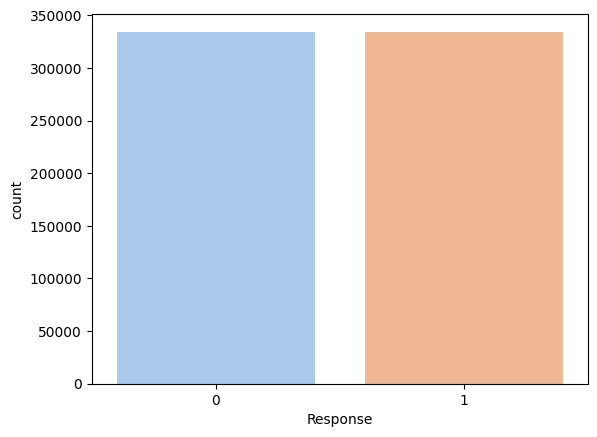

In [ ]:
random_sample= RandomOverSampler()
X_new, y_new= random_sample.fit_resample(X,y)

from collections import Counter
print('Orignal Dataset Shape {}'.format(Counter(y)))
print('Resampled Dataset Shape {}'.format(Counter(y_new)))
sns.countplot(x=y_new, palette='pastel')

In [ ]:
# Splitting data in train and test
X_train, X_test, y_train, y_test= train_test_split(X_new,y_new, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

# **Model Selection**

**I - Logistic Regression**

In [ ]:
lr= LogisticRegression()
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)[:,1]

accu_lr= accuracy_score(y_test, lr_pred)
auc_lr= roc_auc_score(lr_pred, y_test)


print("Accuracy: ", accu_lr)
print("ROC_AUC_Score", auc_lr)

print("---------------------------------------------------------------")
print("Classification Report")
print("---------------------------------------------------------------")
print(classification_report(lr_pred,y_test))

Accuracy:  0.7861792264752792
ROC_AUC_Score 0.8344470646083161
---------------------------------------------------------------
Classification Report
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.96      0.74     62071
           1       0.98      0.71      0.82    138569

    accuracy                           0.79    200640
   macro avg       0.79      0.83      0.78    200640
weighted avg       0.86      0.79      0.79    200640



**ROC- Curve**

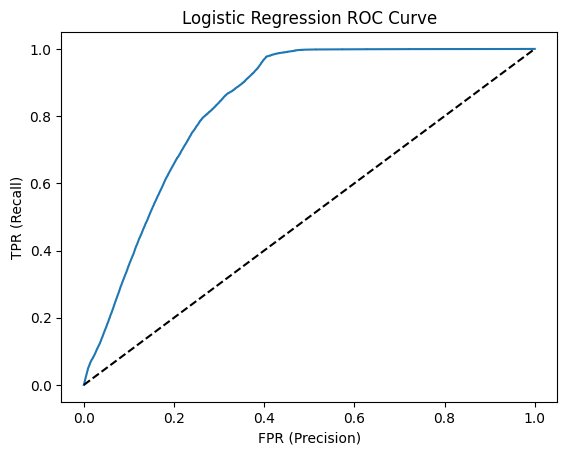

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, _ =roc_curve(y_test, lr_prob)
plt.title("Logistic Regression ROC Curve")
plt.xlabel("FPR (Precision)")
plt.ylabel("TPR (Recall)")
plt.plot(fpr,tpr)
plt.plot((0,1),ls='--',color='black')
plt.show()

**Confusion Matrix**

[[59653 40483]
 [ 2418 98086]]


<Axes: >

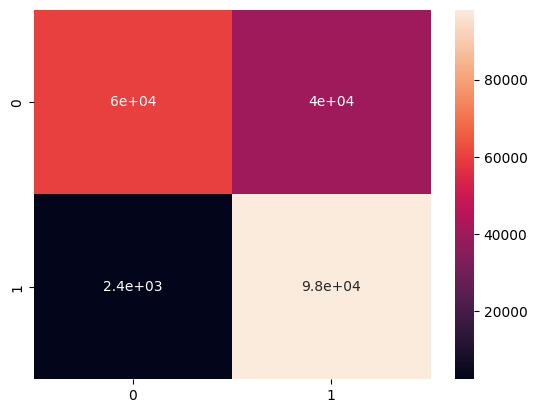

In [ ]:
cm= confusion_matrix(y_test, lr_pred)
print(cm)
sns.heatmap(cm, annot=True)

**II - Random Forest Classifier**

In [ ]:
rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred= rfc.predict(X_test)
rfc_prob= rfc.predict_proba(X_test)[:,1]
auc_rfc= roc_auc_score(rfc_pred, y_test)
accu_rfc= accuracy_score(y_test,rfc_pred)
print("Accuracy Score: ",accu_rfc)
print("ROC_AUC Score: ", auc_rfc)
print("---------------------------------------------------------------")
print("Classification Report")
print("---------------------------------------------------------------")
print(classification_report(rfc_pred, y_test))

Accuracy Score:  0.9415919059011164
ROC_AUC Score:  0.9470388085713982
---------------------------------------------------------------
Classification Report
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     89143
           1       1.00      0.90      0.94    111497

    accuracy                           0.94    200640
   macro avg       0.94      0.95      0.94    200640
weighted avg       0.95      0.94      0.94    200640



**ROC - Curve**

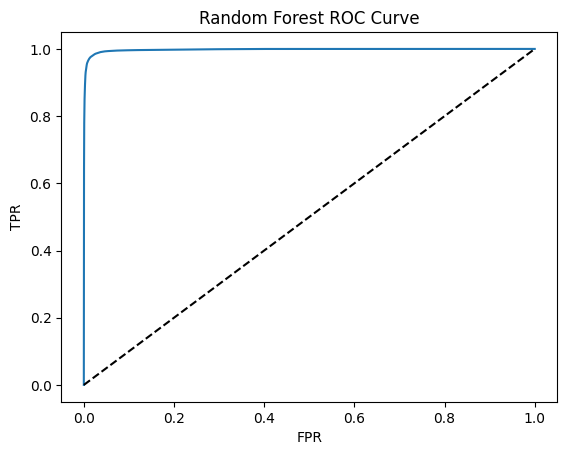

In [ ]:
fpr,tpr,_=roc_curve(y_test,rfc_prob)
plt.title("Random Forest ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr,tpr)
plt.plot((0,1),ls='--',color= 'black')
plt.show()

**Confusion Matrix**

[[ 88709    353]
 [ 11427 100151]]


<Axes: >

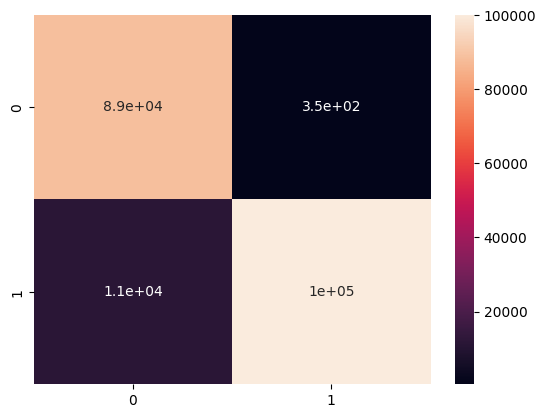

In [ ]:
cm_rfc= confusion_matrix(rfc_pred,y_test)
print(cm_rfc)
sns.heatmap(cm_rfc,annot= True)

**III - XG Boost Classifier**

In [ ]:
xgb= XGBClassifier()
xgb=xgb.fit(X_train, y_train)
xgb_pred=xgb.predict(X_test)
xgb_prob= xgb.predict_proba(X_test)[:,1]

accu_xgb= accuracy_score(y_test,xgb_pred)
auc_xgb= roc_auc_score(xgb_pred, y_test)

print("Accuracy: ",accu_xgb)
print("AUC-ROC Score: ",auc_xgb)

print("---------------------------------------------------------------")
print("Classification Report")
print("---------------------------------------------------------------")
print(classification_report(xgb_pred, y_test))


Accuracy:  0.7837918660287081
AUC-ROC Score:  0.7962218613291607
---------------------------------------------------------------
Classification Report
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.86      0.76     79614
           1       0.89      0.74      0.80    121026

    accuracy                           0.78    200640
   macro avg       0.78      0.80      0.78    200640
weighted avg       0.80      0.78      0.79    200640



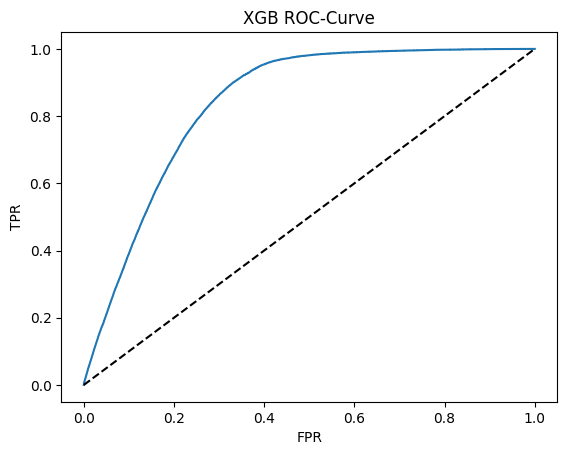

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr, _= roc_curve(y_test,xgb_prob)

plt.title("XGB ROC-Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr,tpr)
plt.plot((0,1), ls='--', color='black')
plt.show()

**Confusion Matrix**

[[68185 11429]
 [31951 89075]]


<Axes: >

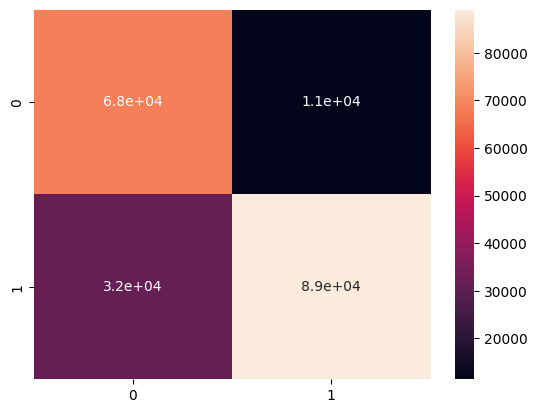

In [ ]:
cm_xgb= confusion_matrix(xgb_pred,y_test)
print(cm_xgb)
sns.heatmap(cm_xgb, annot= True)

# **Comparing Models-**

In [ ]:
index=['Logistic Rgression','Random Forest Classifier','XGB Classifier']
data={"Accuracy": [accu_lr,accu_rfc,accu_xgb], "ROC-AUC": [auc_lr,auc_rfc,auc_xgb]}

result=pd.DataFrame(data=data, index=index)
result

,Accuracy,ROC-AUC
Logistic Rgression,0.786179,0.834447
Random Forest Classifier,0.941592,0.947039
XGB Classifier,0.783792,0.796222


**-Here i developed 3 models — Logistic Regression, Random Forest Classifier, and XGB Classifier—to evaluate performance. Among them, the Random Forest Classifier emerged as the top performer, boasting an impressive accuracy of 94.1% and an outstanding ROC_AUC score of 0.947.**

# **Conclusion**

1) Most of the customers are unwilling for getting a vehicle insurance.

2) More males are interested in getting insurance (61%) as compared to females(38%).

3) People of the group 30-50 are the most interested in getting a vehicle insurance.

4) The customers who have vehicle with age guarantee for 1-2 years are most interested.

5) Customers with driving license.

6) Features like vintage, Annual_Premium, age are impacting the target variable the most.

7) Compairing the models on the basis of ROC curve, accuracy, precision, f1_score and recall the RandomForest is giving the best results.

